<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/spline_tramos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def SplineCubico(p,q):
    
    n = len(p)-1
       
    # Inicializar vectores auxiliares
    A = q
    X = p
    
    H =[0.0 for x	in	range(n)]
    B =[0.0 for	x	in	range(n+1)]
    C =[0.0 for	x	in	range(n+1)]
    D =[0.0 for	x	in	range(n+1)]
    alpha = [0.0 for x in range(n)]
    mu = [0.0 for x in range(n+1)]
    l =[1.0	for	x	in	range(n+1)]
    z =[0.0	for	x	in	range(n+1)]
    # Crear vector H
    for i in range(n):
        H[i] = X [i+1] -X [i]
    # Crear vector a
    for i in range(1, n):
        alpha [i] = (3.0/H [i])*(A [i+1]-A[i])-(3.0/H[i-1])*(A[i]-A[i-1])

    # Solucionar sistema tridiagonal
    for i in range(1, n) :
        l[i] = 2.0*(X[i+1]-X[i-1] )-H[i-1] *mu[i-1]
        mu[i] = float(H [i])/l[i]
        z[i] = (alpha [i]-H [i-1] *z [i-1] )/float(l[i] )

    # Solucionar sistema tridiagonal
    for j in range(n-1, -1, -1):
        C[j] = z [j] -mu[j] *C [j+1]
        B [j] = (A [j + 1] - A [j] )/float (H [j] )-H [j] * (C [j + 1] +2*C [j] )/3.0
        D[j] = (C[j+1] -C[j])/(3.0*H[j])

    # Retornar vectores A, B, C, D
    
    x = sym.Symbol('x')
    polinomio = []
    
    for j in range(0,n,1):  # construimos polinomio por tramos
        ptramo = A[j]+ B[j]*(x-X[j])+ C[j]*(x-X[j])**2 + D[j]*(x-X[j])**3
        ptramo = ptramo.expand()
        polinomio.append(ptramo)
        print(ptramo)
    
    return polinomio

In [0]:
xi = np.array([-1 , 0, 2,3,7])
fi = np.array([2, -1, 2,2,-1])
poli = SplineCubico(xi,fi)
n = len(xi)
# Obtiene los polinomios por tramos

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])+','+str(xi[tramo])+']')
    print(str(poli[tramo-1]))

0.936305732484076*x**3 + 2.80891719745223*x**2 - 1.12738853503185*x - 1.0
-0.747611464968153*x**3 + 2.80891719745223*x**2 - 1.12738853503185*x - 1
0.539808917197452*x**3 - 4.9156050955414*x**2 + 14.3216560509554*x - 11.2993630573248
0.00477707006369427*x**3 - 0.10031847133758*x**2 - 0.124203821656051*x + 3.14649681528662
Polinomios por tramos: 
 x = [-1,0]
0.936305732484076*x**3 + 2.80891719745223*x**2 - 1.12738853503185*x - 1.0
 x = [0,2]
-0.747611464968153*x**3 + 2.80891719745223*x**2 - 1.12738853503185*x - 1
 x = [2,3]
0.539808917197452*x**3 - 4.9156050955414*x**2 + 14.3216560509554*x - 11.2993630573248
 x = [3,7]
0.00477707006369427*x**3 - 0.10031847133758*x**2 - 0.124203821656051*x + 3.14649681528662


In [0]:
pol = sym.lambdify('x',poli[0])
print(pol(-0.5))

0.14888535031847294


In [0]:
z = lambda x: -1.60000000000002*x**3 + 0.600000000000037*x**2 + 96.3*x + 1.1

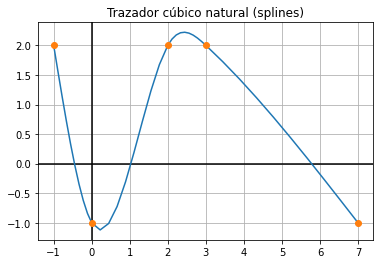

In [0]:
# GRAFICA
# Puntos para grafica en cada tramo
xtrazado = np.array([])
ytrazado = np.array([])
resolucion = 10 # entre cada par de puntos
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,resolucion)
    
    ptramo = poli[tramo-1]
    pxtramo = sym.lambdify('x',ptramo)
    ytramo = pxtramo(xtramo)
    
    xtrazado = np.concatenate((xtrazado,xtramo))
    ytrazado = np.concatenate((ytrazado,ytramo))
    tramo = tramo + 1

# Gráfica
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Trazador cúbico natural (splines)')
plt.plot(xtrazado,ytrazado)
plt.plot(xi,fi,'o')
plt.show()

In [0]:
xi= np.array([0.25,0.5,1,1.25])
fi= np.array([25.2,49.2,96.4,119.4])
poli = SplineCubico(xi,fi)
n = len(xi)
# Obtiene los polinomios por tramos

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])+','+str(xi[tramo])+']')
    print(str(poli[tramo-1]))

-2.4*x**3 + 1.8*x**2 + 95.7*x + 1.19999999999999
-1.60000000000002*x**3 + 0.600000000000037*x**2 + 96.3*x + 1.1
5.60000000000004*x**3 - 21.0000000000002*x**2 + 117.9*x - 6.10000000000007
Polinomios por tramos: 
 x = [0.25,0.5]
-2.4*x**3 + 1.8*x**2 + 95.7*x + 1.19999999999999
 x = [0.5,1.0]
-1.60000000000002*x**3 + 0.600000000000037*x**2 + 96.3*x + 1.1
 x = [1.0,1.25]
5.60000000000004*x**3 - 21.0000000000002*x**2 + 117.9*x - 6.10000000000007


In [0]:
a = z(0.75)
print(a)

72.9875


In [0]:
print ('error ',(73-a)*100)

error  1.2500000000002842


In [0]:
pol = sym.lambdify('x',poli[0])
pol

<function numpy.<lambda>>

In [0]:
pol = sym.lambdify('x',poli[1])
pol

<function numpy.<lambda>>

In [0]:
pol(10)

-478.9936305732485

cs <scipy.interpolate._cubic.CubicSpline object at 0x7fa95f47a410>
0.6146496815286623


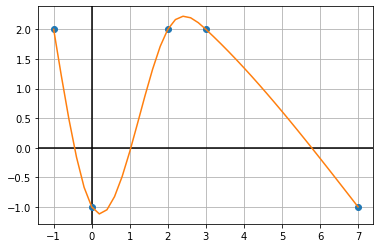

In [0]:
from scipy.interpolate import CubicSpline
xi = np.array([-1 , 0, 2,3,7])
fi = np.array([2, -1, 2,2,-1])

cs = CubicSpline(xi, fi, bc_type='natural')
print('cs',cs)
a=cs(5)
print(a)
xs = np.linspace(-1, 7, num=41, endpoint=True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()
plt.plot(xi, fi, 'o', label='data')
plt.plot(xs, cs(xs), label='true')
plt.show()

In [0]:
xi= np.array([0,1,2])
fi= np.array([0,1,2])
poli = SplineCubico(xi,fi)
n = len(xi)
# Obtiene los polinomios por tramos

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])+','+str(xi[tramo])+']')
    print(str(poli[tramo-1]))

1.0*x
1.0*x
Polinomios por tramos: 
 x = [0,1]
1.0*x
 x = [1,2]
1.0*x


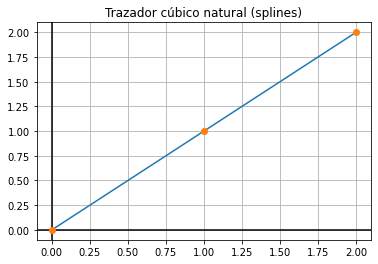

In [0]:
# GRAFICA
# Puntos para grafica en cada tramo
xtrazado = np.array([])
ytrazado = np.array([])
resolucion = 10 # entre cada par de puntos
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,resolucion)
    
    ptramo = poli[tramo-1]
    pxtramo = sym.lambdify('x',ptramo)
    ytramo = pxtramo(xtramo)
    
    xtrazado = np.concatenate((xtrazado,xtramo))
    ytrazado = np.concatenate((ytrazado,ytramo))
    tramo = tramo + 1

# Gráfica
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Trazador cúbico natural (splines)')
plt.plot(xtrazado,ytrazado)
plt.plot(xi,fi,'o')
plt.show()

![texto alternativo](https://)